In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
data = pd.read_csv('Airbnb_Open_Data.csv',low_memory=False)

In [94]:
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [95]:
data.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [96]:
#license is mostly null values

In [97]:
#dropping it seems ok?

In [98]:
data.pop('license')

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
102594    NaN
102595    NaN
102596    NaN
102597    NaN
102598    NaN
Name: license, Length: 102599, dtype: object

In [99]:
data.isnull().sum()/data.shape[0] * 100

id                                 0.000000
NAME                               0.243667
host id                            0.000000
host_identity_verified             0.281679
host name                          0.395715
neighbourhood group                0.028265
neighbourhood                      0.015595
lat                                0.007797
long                               0.007797
country                            0.518524
country code                       0.127682
instant_bookable                   0.102340
cancellation_policy                0.074075
room type                          0.000000
Construction year                  0.208579
price                              0.240743
service fee                        0.266084
minimum nights                     0.398639
number of reviews                  0.178364
last review                       15.490404
reviews per month                 15.476759
review rate number                 0.317742
calculated host listings count  

In [100]:
data.columns = [col.lower().replace(" ","_") for col in data.columns]

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [102]:
data.describe()

,id,host_id,lat,long,construction_year,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


Cleaning the data

In [103]:
data["host_id"].unique().shape[0]/data["host_id"].shape[0] * 100

99.47172974395461

In [104]:
#99.47% of host_id is unique, so we can drop this coloumn also

In [105]:
data.pop('host_id')

0         80014485718
1         52335172823
2         78829239556
3         85098326012
4         92037596077
             ...     
102594    12312296767
102595    77864383453
102596    69050334417
102597    11160591270
102598    68170633372
Name: host_id, Length: 102599, dtype: int64

In [106]:
data["host_identity_verified"].value_counts()

unconfirmed    51200
verified       51110
Name: host_identity_verified, dtype: int64

In [107]:
#we can drop country and country_code coloumns

In [108]:
data.pop('country')

0         United States
1         United States
2         United States
3         United States
4         United States
              ...      
102594    United States
102595    United States
102596    United States
102597    United States
102598    United States
Name: country, Length: 102599, dtype: object

In [109]:
data.pop('country_code')

0         US
1         US
2         US
3         US
4         US
          ..
102594    US
102595    US
102596    US
102597    US
102598    US
Name: country_code, Length: 102599, dtype: object

In [110]:
#in service fees there is an unwanted dollar sign which needs to be removed

In [111]:
def remove_dollar_sign(value):
    if pd.isna(value):
        return np.NaN
    else:
        return float(value.replace("$", "").replace(",", "").replace(" ", ""))
    
data["price"] = data["price"].apply(lambda x: remove_dollar_sign(x))


In [112]:
data["service_fee"] = data["service_fee"].apply(lambda x: remove_dollar_sign(x))

In [113]:
data.head()

,id,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
0,1001254,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,...,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,...,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,...,620.0,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,...,368.0,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,...,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [114]:
#now to convert all the coloumns to their correct datatype

In [115]:
#many of the coloumns are in float64 type unnecessarily

In [119]:
data["minimum_nights"] = np.array(data["minimum_nights"], dtype = np.int16)
data["number_of_reviews"] = np.array(data["number_of_reviews"], dtype = np.int16)
data["last_review"] = pd.to_datetime(data["last_review"])
data["review_rate_number"] = np.array(data["review_rate_number"], dtype=np.int8)
data["calculated_host_listings_count"] = np.array(data["calculated_host_listings_count"], dtype = np.int16)

In [121]:
data.pop('house_rules') #this just seems useless rn, maybe i can search for keywords like no pets or no smoking later to see their correlation to the price?

0         Clean up and treat the home the way you'd like...
1         Pet friendly but please confirm with me if the...
2         I encourage you to use my kitchen, cooking and...
3                                                       NaN
4         Please no smoking in the house, porch or on th...
                                ...                        
102594    No Smoking No Parties or Events of any kind Pl...
102595    House rules: Guests agree to the following ter...
102596                                                  NaN
102597                                                  NaN
102598                                                  NaN
Name: house_rules, Length: 102599, dtype: object

Visualization

In [129]:
def plot_bar_chart(column_name: str, hue: str=None, top_values: int = None, palette: str = "flare", show_grid : bool = True, 
figsize: tuple = (16, 9), bar_font_size: int=14, bar_angle: int=45, angle: int=45):
    fig = plt.figure(facecolor = (247/255, 247/255, 247/255), figsize = figsize)
    ax = plt.subplot(1, 1, 1)
    
    ax.set_facecolor((247/255, 247/255, 247/255))
    counts = None
    
    if top_values is not None:
        counts = data[column_name].value_counts().iloc[:top_values]
    else:
        counts = data[column_name].value_counts()
        
    bar_ax = sns.barplot(x = counts.keys(), y = counts, palette = palette, ax = ax, hue = data[hue] if hue is not None else None) 
    
    for i in bar_ax.containers:
        bar_ax.bar_label(i, rotation=bar_angle, fontsize = bar_font_size)
        
    plt.xticks(rotation = angle, fontsize = 14)
    plt.xlabel(f"{column_name}", fontweight="bold", fontsize = 18)
    plt.ylabel("count", fontweight="bold", fontsize = 18)
    plt.title(f"Top {top_values} {column_name}" if top_values is not None else f"{column_name}", fontsize = 27)
    if show_grid: plt.grid()
    plt.show()

In [130]:
def plot_pie_chart(column_name: str, startangle: int=45, loc: str="center", explodes: float=0.09, colors: list = None):
    values = df[column_name].value_counts()
    keys = values.keys()
    total_records = df[column_name].count()

    labels = ["{0} - {1:1.2f} %".format(i, j/total_records * 100) for i, j in zip(keys, values)]
    explodes = [explodes/len(keys) for i in range(len(keys))]

    plt.subplots(figsize = (16, 9))
    # draw the pie chart
    patches, texts = plt.pie(values, startangle = startangle, explode = explodes, colors = colors)

    # draw circle
    center_circle = plt.Circle(xy = (0, 0), radius = 0.70, fc = "white")
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    plt.title(column_name, fontsize = 25, fontweight = "bold")
    plt.legend(patches, labels, loc=loc, fontsize = 14)
    plt.show()

In [143]:
def plot_line_chart(column_name, xlabel, ylabel, title):
    value = data[column_name].value_counts().sort_index()
    keys = np.array(value.keys(), dtype = np.int16)

    fig = plt.figure(facecolor = (247/255, 247/255, 247/255), figsize = (16, 7))
    ax  = plt.subplot(1, 1, 1)
    ax.set_facecolor((247/255, 247/255, 247/255))
    ax.plot(value, 'o--', c="black", markerfacecolor='none', markersize=12, markeredgecolor="red", markeredgewidth = 3, linewidth=2)
    plt.xlabel(xlabel, fontsize = 20, fontweight = "bold")
    plt.ylabel(ylabel, fontsize = 20, fontweight = "bold")
    plt.xticks(ticks = keys, fontsize = 12, rotation = 15)
    plt.title(title, fontsize = 24, fontweight = "bold")
    plt.show()


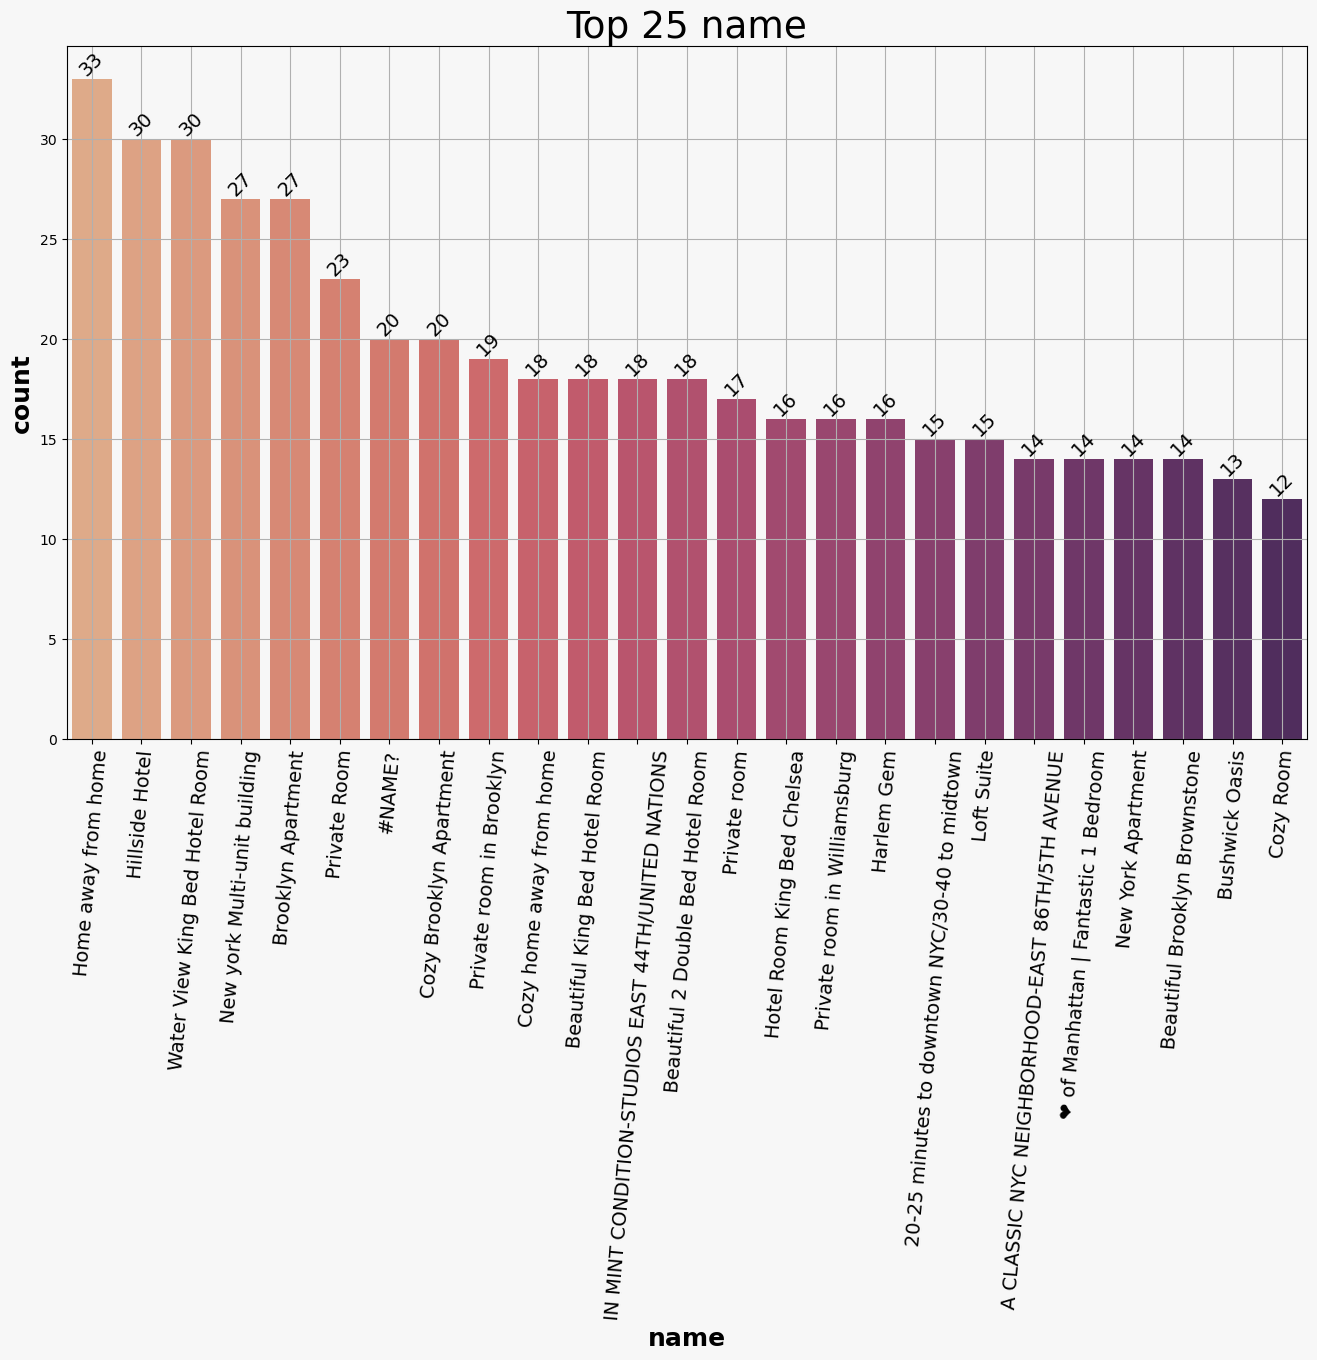

In [144]:
plot_bar_chart(column_name = "name", top_values = 25, palette = "flare", show_grid = True, angle = 85)


C:\Users\shrey\AppData\Local\Temp\ipykernel_25212\3577365026.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = data[['id','name','host_identity_verified','host_name','neighbourhood_group','neighbourhood','lat','long','instant_bookable','cancellation_policy','construction_year','price','service_fee','minimum_nights','number_of_reviews','last_review','reviews_per_month','review_rate_number','calculated_host_listings_count','availability_365']].corr()


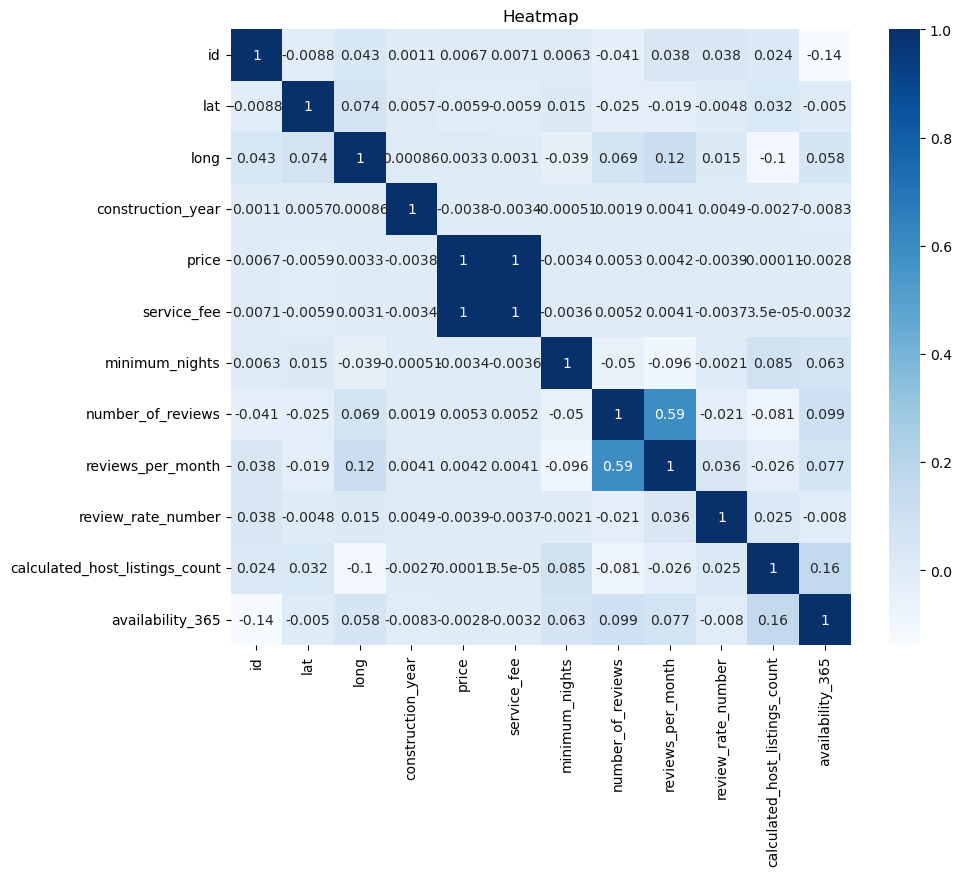

In [145]:
correlation_mat = data[['id','name','host_identity_verified','host_name','neighbourhood_group','neighbourhood','lat','long','instant_bookable','cancellation_policy','construction_year','price','service_fee','minimum_nights','number_of_reviews','last_review','reviews_per_month','review_rate_number','calculated_host_listings_count','availability_365']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat,annot=True,cmap="Blues")
plt.title("Heatmap")
plt.show()

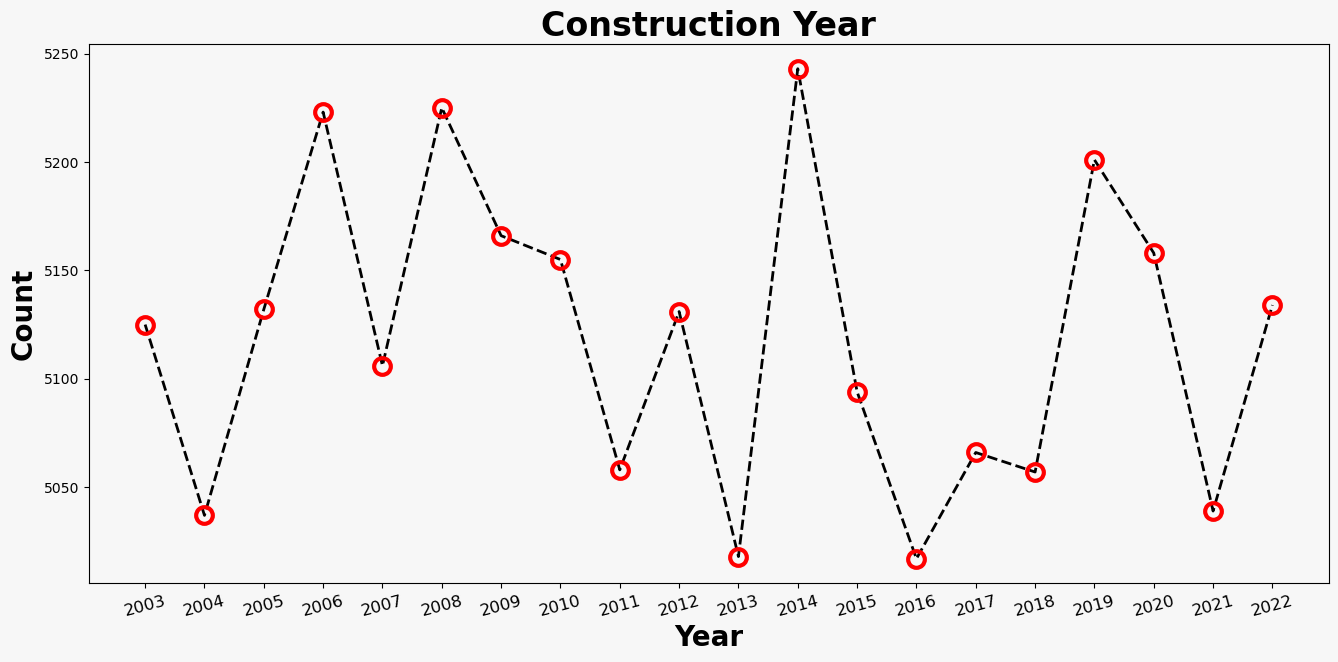

In [146]:
plot_line_chart("construction_year", "Year", "Count", "Construction Year")


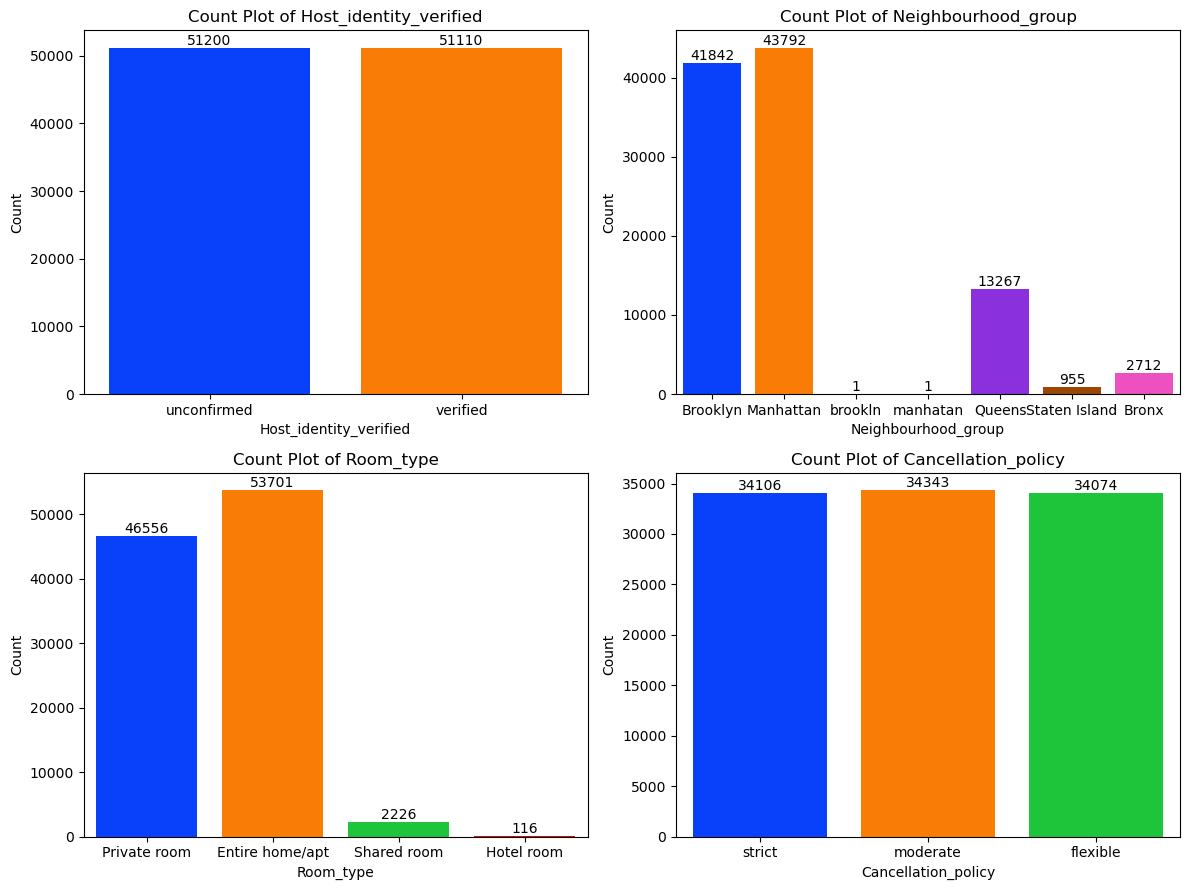

In [155]:
categorical_columns = ["host_identity_verified","neighbourhood_group","room_type","cancellation_policy"]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=data[column], data=data, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()
